씨앗의 품종에 대해 라벨링된 데이터를 가진 특성으로 분류한다.
https://archive.ics.uci.edu/dataset/236/seeds
1. area A, 씨앗의 면적
2. perimeter P,씨앗의 둘레
3. compactness C = 4*pi*A/P^2,조밀도
4. length of kernel,씨앗의 길이
5. width of kernel,씨앗의 너비
6. asymmetry coefficient 비대칭 계수
7. length of kernel groove.씨앗 홈의 길이
씨앗 데이터

Seeds 데이터셋은 세 가지 밀 품종(Kama, Rosa, Canadian)의 210개의 샘플로 구성되어 있다. Polish Academy of Sciences에서 수집되었으며, 연부 X선(Soft X-ray) 기술을 활용해 비파괴적으로 씨앗 내부 구조를 촬영했다. 데이터는 면적, 둘레, 콤팩트함, 길이, 너비, 비대칭 계수, 홈의 길이 등 7가지 특성을 포함한다

라벨이 마지막 열

    area  perimeter  compactness  lengthOfKernel  widthOfKernel  \
0  15.26      14.84       0.8710           5.763          3.312   
1  14.88      14.57       0.8811           5.554          3.333   
2  14.29      14.09       0.9050           5.291          3.337   
3  13.84      13.94       0.8955           5.324          3.379   
4  16.14      14.99       0.9034           5.658          3.562   

   asymmetryCoefficient  lengthOfKernelGgroove.  wheatSpecies  
0                 2.221                   5.220             1  
1                 1.018                   4.956             1  
2                 2.699                   4.825             1  
3                 2.259                   4.805             1  
4                 1.355                   5.175             1  
Scaled data
        area  perimeter  compactness  lengthOfKernel  widthOfKernel  \
0  0.142098   0.215462     0.000061        0.304218       0.141702   
1  0.011188   0.008224     0.428515       -0.168625       0.

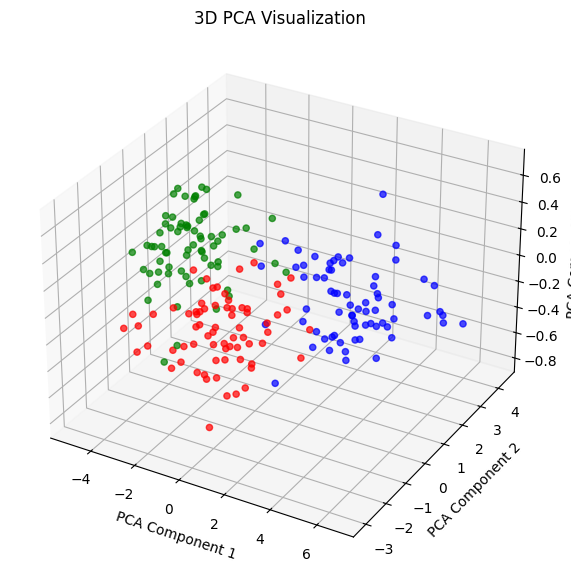

In [3]:
# 자료구조
import pandas as pd
import numpy as np
# normalize
from sklearn.preprocessing import StandardScaler
# 분류기
from sklearn import tree, ensemble, svm
# 분류 성능평가용
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
# 데이터 시각화용
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# 파라미터 조정
test_rate =0.8
randseed = 42
np.random.seed(randseed)
cri = "\t"
file_path = r"./data.txt"
# 분류 옵션
modellist=["decision tree","random forest","adaboost","SVM"]
# 스케일조정옵션
isScaling = True


# 파일에서 데이터 로드
# file_path, cri -> df
match(file_path.split(".")[-1].lower()):
    case "txt":
        df = pd.read_csv(file_path, delimiter=cri, skipinitialspace=True)
    case "csv":
        df = pd.read_csv(file_path, delimiter=cri, skipinitialspace=True)
    case "xlsx":
        df = pd.read_excel(file_path)
    case _:
        raise ValueError("Unsupported file type")


# 데이터 형태 파악
print(df.head())
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df.iloc[:,:-1])
lab = df.iloc[:,-1]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
custom_colors = ['red', 'blue', 'green']
cmap = ListedColormap(custom_colors)
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=lab, cmap=cmap, alpha=0.7)
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D PCA Visualization")


# normalize
if isScaling:
    features = df.drop(df.columns[-1], axis=1)
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
    df_scaled['wheatSpecies'] = df['wheatSpecies']
    print("Scaled data\n",df_scaled.head())
    df = df_scaled


# 섞고 test data 분리
# df, test_rate -> train_data, test_data,train_size
data_size = len(df)
train_size = int(test_rate * data_size)
indice = np.arange(data_size)
np.random.shuffle(indice)

train_idx = indice[:train_size]
test_idx = indice[train_size:]

train_data = df.iloc[train_idx]
test_data = df.iloc[test_idx]
#라벨 분리
train_labels = train_data.iloc[:,-1]
test_labels = test_data.iloc[:,-1]
train_data = train_data.iloc[:,:-1]
test_data = test_data.iloc[:,:-1]


# 분류실행/결과 출력까지
# train_data,train_labels ,test_data, modellist-> predicted
# predicted, test_labels -> 결과 출력
for model in modellist:
    match(model):
        case "decision tree":
            classifier = tree.DecisionTreeClassifier(max_depth=3)
        case "random forest":
            classifier = ensemble.RandomForestClassifier(n_estimators=20, random_state=42)
        case "adaboost":
            classifier = ensemble.AdaBoostClassifier(estimator = tree.DecisionTreeClassifier(max_depth=3),n_estimators=20, random_state=42)
        case "SVM":
            classifier = svm.SVC(C = 1.0, gamma = 0.001)
        case _:
            raise ValueError("Unsupported model")

    classifier.fit(train_data, train_labels)
    predicted = classifier.predict(test_data)

    expected = test_labels
    print(15*"-")
    print(model,"\n random seed:",randseed," test_rate:",test_rate)
    print('Accuracy:',accuracy_score(expected, predicted))
    print('Confusion matrix:\n', confusion_matrix(expected, predicted))
    print("각 클래스의 점수")
    print("precision:",precision_score(expected, predicted, average=None))
    print("recall:",recall_score(expected, predicted, average=None))
    print("f-measure:",f1_score(expected, predicted, average=None))
    print("\n 평균점수")
    print("precision:",precision_score(expected, predicted, average='macro'))
    print("recall:",recall_score(expected, predicted, average='macro'))
    print("f-measure:",f1_score(expected, predicted, average='macro'))
    print(15*"-")


씨앗 분류 바이너리 1번과 2번 씨앗 비교

In [5]:
# 자료구조
import pandas as pd
import numpy as np
# 분류기
from sklearn import tree, ensemble, svm
# normalize
from sklearn.preprocessing import StandardScaler
# 분류 성능평가용
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
# 데이터 시각화용
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# 파라미터 조정
test_rate =0.8
randseed = 42
np.random.seed(randseed)
cri = "\t"
file_path = r"./data.txt"
# 분류 옵션
modellist=["decision tree","random forest","adaboost","SVM"]
# 스케일조정옵션
isScaling = True


# 파일에서 데이터 로드
# file_path, cri -> df
match(file_path.split(".")[-1].lower()):
    case "txt":
        df = pd.read_csv(file_path, delimiter=cri, skipinitialspace=True)
    case "csv":
        df = pd.read_csv(file_path, delimiter=cri, skipinitialspace=True)
    case "xlsx":
        df = pd.read_excel(file_path)
    case _:
        raise ValueError("Unsupported file type")

# 바이너리를 위해 씨앗 종류 3번을 제거
df = df[df.iloc[:,-1]!=3]

# normalize
if isScaling:
    features = df.drop(df.columns[-1], axis=1)
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
    df_scaled['wheatSpecies'] = df['wheatSpecies']
    print("Scaled data\n",df_scaled.head())
    df = df_scaled


# 섞고 test data 분리
# df, test_rate -> train_data, test_data,train_size
data_size = len(df)
train_size = int(test_rate * data_size)
indice = np.arange(data_size)
np.random.shuffle(indice)

train_idx = indice[:train_size]
test_idx = indice[train_size:]

train_data = df.iloc[train_idx]
test_data = df.iloc[test_idx]
#라벨 분리
train_labels = train_data.iloc[:,-1]
test_labels = test_data.iloc[:,-1]
train_data = train_data.iloc[:,:-1]
test_data = test_data.iloc[:,:-1]


# 분류실행/결과 출력까지
# train_data,train_labels ,test_data, modellist-> predicted
# predicted, test_labels -> 결과 출력
for model in modellist:
    match(model):
        case "decision tree":
            classifier = tree.DecisionTreeClassifier(max_depth=3)
        case "random forest":
            classifier = ensemble.RandomForestClassifier(n_estimators=20, random_state=42)
        case "adaboost":
            classifier = ensemble.AdaBoostClassifier(estimator = tree.DecisionTreeClassifier(max_depth=3),n_estimators=20, random_state=42)
        case "SVM":
            classifier = svm.SVC(C = 1.0, gamma = 0.001)
        case _:
            raise ValueError("Unsupported model")

    classifier.fit(train_data, train_labels)
    predicted = classifier.predict(test_data)

    expected = test_labels
    print(15*"-")
    print(model,"\n random seed:",randseed," test_rate:",test_rate)
    print('Accuracy:',accuracy_score(expected, predicted))
    print('Confusion matrix:\n', confusion_matrix(expected, predicted))
    print("precision:",precision_score(expected, predicted, average=None))
    print("recall:",recall_score(expected, predicted, average=None))
    print("f-measure:",f1_score(expected, predicted, average=None))
    print(15*"-")


Scaled data
        area  perimeter  compactness  lengthOfKernel  widthOfKernel  \
0 -0.448061  -0.342443    -0.681854       -0.160487      -0.529055   
1 -0.606541  -0.589001    -0.043814       -0.676174      -0.454501   
2 -0.852600  -1.027328     1.466001       -1.325101      -0.440300   
3 -1.040273  -1.164305     0.865865       -1.243677      -0.291192   
4 -0.081057  -0.205466     1.364926       -0.419564       0.358494   

   asymmetryCoefficient  lengthOfKernelGgroove.  wheatSpecies  
0             -0.737781               -0.626726             1  
1             -1.686929               -1.122240             1  
2             -0.360646               -1.368120             1  
3             -0.707799               -1.405659             1  
4             -1.421041               -0.711189             1  
---------------
decision tree 
 random seed: 42  test_rate: 0.8
Accuracy: 0.9642857142857143
Confusion matrix:
 [[11  1]
 [ 0 16]]
precision: [1.         0.94117647]
recall: [0.91666

의료기관종별 진료과목별 진료비 통계로 의료기관종별 분류
https://www.data.go.kr/data/15139382/fileData.do


건강보험심사평가원_의료기관종별 진료과목별 진료비 통계_2023년 데이터

341개 데이터
2023년 수집된 데이터로
의료기관종별(9종류(14종류)상급종합병원,종합병원,병원,요양병원,정신병원,의원,치과병원,보건소,보건지소,보건진료소,보건의료원,한방병원,한의원)
진료과목(내과, 일반의, ...)
환자수
명세서청구건수
입내원일수
요양급여비용총액
보험자부담금



한의원,보건소,치과의원,보건지소,보건진료소는 샘플이 1개씩이라 제외

진료과목은 너무 다양해 제외하고 환자수, 명세서청구건수,입내원일수,요양급여비용총액,보험자부담금로 의료기관종별을 분류하는 것을 목적으로함

라벨이 첫번째 열

   의료기관종별      환자수   명세서청구건수     입내원일수       요양급여비용총액         보험자부담금
0       0      197       227       228       12438280        3686020
1       0  3868874  19718697  25106113  8160044150140  6750585175490
2       0   810134   2537395   3007901   612663538140   422378934480
3       0   276797   1398016   1629588   213390628930   137256247130
4       0   999944   3739235   5441727  2362437878060  2054028010630
Scaled data
         환자수   명세서청구건수     입내원일수   요양급여비용총액     보험자부담금  의료기관종별
0 -0.235013 -0.210256 -0.236419  -0.297400  -0.289855       0
1  1.381297  1.539868  1.947608  10.239579  10.710809       0
2  0.103374  0.014932  0.025227   0.493711   0.398442       0
3 -0.119451 -0.086194 -0.094676  -0.021867  -0.066190       0
4  0.182675  0.121602  0.236951   2.753180   3.057357       0
---------------
decision tree 
 random seed: 42  test_rate: 0.8
Accuracy: 0.1323529411764706
Confusion matrix:
 [[ 1  1  3  0  0  0  0  0  0]
 [ 2  0  8  0  0  0  0  0  0]
 [ 0  2  7  0  0  0  0  0  0]

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

---------------
SVM 
 random seed: 42  test_rate: 0.8
Accuracy: 0.1323529411764706
Confusion matrix:
 [[ 0  0  0  5  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0]
 [ 0  0  0  3  0  1  0  0  0]
 [ 0  0  0  7  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0]]
각 클래스의 점수
precision: [0.         0.         0.         0.11940299 0.         1.
 0.         0.         0.        ]
recall: [0.   0.   0.   1.   0.   0.25 0.   0.   0.  ]
f-measure: [0.         0.         0.         0.21333333 0.         0.4
 0.         0.         0.        ]

 평균점수
precision: 0.12437810945273631
recall: 0.1388888888888889
f-measure: 0.06814814814814815
---------------


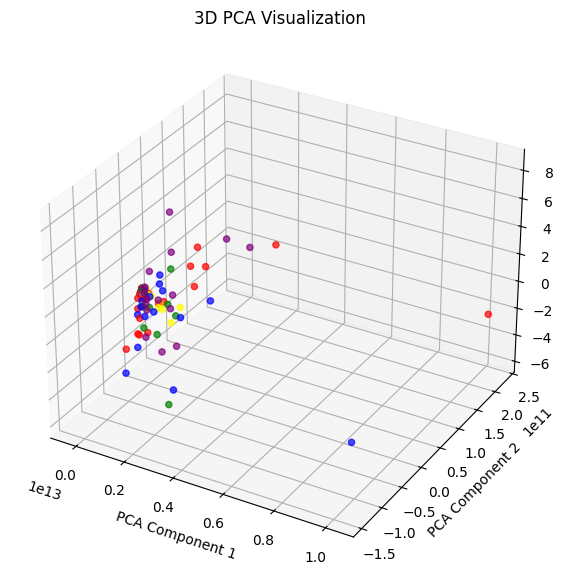

In [6]:
# 자료구조
import pandas as pd
import numpy as np
# normalize
from sklearn.preprocessing import StandardScaler
# 분류기
from sklearn import tree, ensemble, svm
# 분류 성능평가용
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
# 데이터 시각화용
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# 파라미터 조정
test_rate =0.8
randseed = 42
np.random.seed(randseed)
cri = ","
file_path = r"./data.csv"
# 분류 옵션
modellist=["decision tree","random forest","adaboost","SVM"]
# 스케일조정옵션
isScaling = True


# 파일에서 데이터 로드
# file_path, cri -> df
match(file_path.split(".")[-1].lower()):
    case "txt":
        df = pd.read_csv(file_path, delimiter=cri, skipinitialspace=True)
    case "csv":
        df = pd.read_csv(file_path, delimiter=cri, skipinitialspace=True)
    case "xlsx":
        df = pd.read_excel(file_path)
    case _:
        raise ValueError("Unsupported file type")


# 맞춤데이터 편집
# 진료년도, 진료과목 삭제
df = df.drop(df.columns[[0, 2]], axis=1)
# 하나씩밖에 없는 의료기관(특이케이스 삭제)
df = df.drop([269, 270,271, 272, 340],axis=0)
df = df.reset_index(drop=True)
# 의료기관종별 라벨을 0부터 시작하는 정수형 라벨로 변경
df['의료기관종별'] = pd.factorize(df['의료기관종별'])[0]


# 데이터 형태 파악
print(df.head())
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df.iloc[:,1:])
lab = df.iloc[:,0]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
custom_colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'brown', 'pink', 'gray']
cmap = ListedColormap(custom_colors)
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=lab, cmap=cmap, alpha=0.7)
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D PCA Visualization")


# normalize
if isScaling:
    features = df.drop(df.columns[0], axis=1)
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
    df_scaled['의료기관종별'] = df['의료기관종별']
    print("Scaled data\n",df_scaled.head())
    df = df_scaled
else:
    # 노말라이즈를 하지 않아도 라벨이 마지막 열로 가게 조정
    tmp= df['의료기관종별']
    df = df.drop('의료기관종별', axis=1)
    df['의료기관종별'] = tmp


# 섞고 test data 분리
# df, test_rate -> train_data, test_data,train_size
data_size = len(df)
train_size = int(test_rate * data_size)
indice = np.arange(data_size)
np.random.shuffle(indice)

train_idx = indice[:train_size]
test_idx = indice[train_size:]

train_data = df.iloc[train_idx]
test_data = df.iloc[test_idx]
#라벨 분리
train_labels = train_data.iloc[:,-1]
test_labels = test_data.iloc[:,-1]
train_data = train_data.iloc[:,:-1]
test_data = test_data.iloc[:,:-1]


# 분류실행/결과 출력까지
# train_data,train_labels ,test_data, modellist-> predicted
# predicted, test_labels -> 결과 출력
for model in modellist:
    match(model):
        case "decision tree":
            classifier = tree.DecisionTreeClassifier(max_depth=3)
        case "random forest":
            classifier = ensemble.RandomForestClassifier(n_estimators=20, random_state=42)
        case "adaboost":
            classifier = ensemble.AdaBoostClassifier(estimator = tree.DecisionTreeClassifier(max_depth=3),n_estimators=20, random_state=42)
        case "SVM":
            classifier = svm.SVC(C = 1.0, gamma = 0.001)
        case _:
            raise ValueError("Unsupported model")

    classifier.fit(train_data, train_labels)
    predicted = classifier.predict(test_data)

    expected = test_labels
    print(15*"-")
    print(model,"\n random seed:",randseed," test_rate:",test_rate)
    print('Accuracy:',accuracy_score(expected, predicted))
    print('Confusion matrix:\n', confusion_matrix(expected, predicted))
    print("각 클래스의 점수")
    print("precision:",precision_score(expected, predicted, average=None))
    print("recall:",recall_score(expected, predicted, average=None))
    print("f-measure:",f1_score(expected, predicted, average=None))
    print("\n 평균점수")
    print("precision:",precision_score(expected, predicted, average='macro'))
    print("recall:",recall_score(expected, predicted, average='macro'))
    print("f-measure:",f1_score(expected, predicted, average='macro'))
    print(15*"-")


병원
바이너리 분류
가장 수가 50,50으로 많은 병원과 요양병원에 대해서만 분류를 시행해본다.

   의료기관종별      환자수   명세서청구건수     입내원일수       요양급여비용총액        보험자부담금
0       2     6934     20499     38013     6679383010    5893742790
1       2  3632844  11567050  13963474  1232080493940  910300371560
2       2   310290    922197   1594670   233187107210  175072786280
3       2    37244    190167    516887    45564893810   35295149370
4       2  1015576   2618930   3429498   476933192020  356129003520
Scaled data
         환자수   명세서청구건수     입내원일수  요양급여비용총액    보험자부담금  의료기관종별
0 -0.286911 -0.275838 -0.372936 -0.368950 -0.369037       2
1  5.432925  4.369316  3.439806  2.948720  2.868643       2
2  0.191630  0.086914  0.053271  0.244300  0.236606       2
3 -0.239097 -0.207581 -0.241822 -0.263671 -0.263783       2
4  1.304212  0.769506  0.555640  0.904222  0.884768       2
---------------
decision tree 
 random seed: 42  test_rate: 0.8
Accuracy: 0.8
Confusion matrix:
 [[ 5  3]
 [ 1 11]]
각 클래스의 점수
precision: [0.83333333 0.78571429]
recall: [0.625      0.91666667]
f-measure: [0.71428571 0.8

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


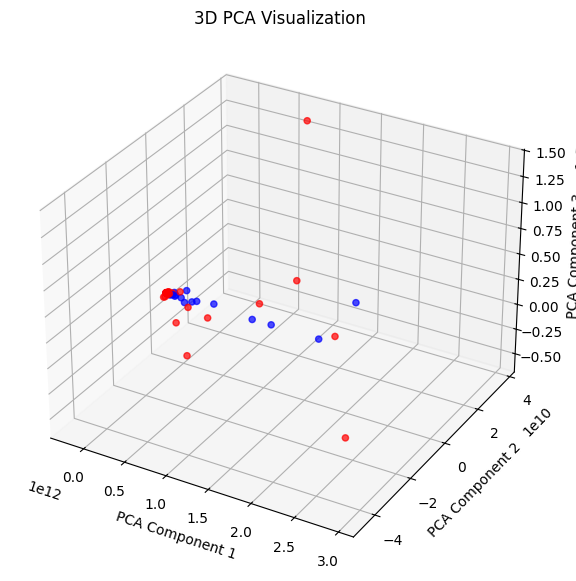

In [7]:
# 자료구조
import pandas as pd
import numpy as np
# normalize
from sklearn.preprocessing import StandardScaler
# 분류기
from sklearn import tree, ensemble, svm
# 분류 성능평가용
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
# 데이터 시각화용
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# 파라미터 조정
test_rate =0.8
randseed = 42
np.random.seed(randseed)
cri = ","
file_path = r"./data.csv"
# 분류 옵션
modellist=["decision tree","random forest","adaboost","SVM"]
# 스케일조정옵션
isScaling = True


# 파일에서 데이터 로드
# file_path, cri -> df
match(file_path.split(".")[-1].lower()):
    case "txt":
        df = pd.read_csv(file_path, delimiter=cri, skipinitialspace=True)
    case "csv":
        df = pd.read_csv(file_path, delimiter=cri, skipinitialspace=True)
    case "xlsx":
        df = pd.read_excel(file_path)
    case _:
        raise ValueError("Unsupported file type")


# 맞춤데이터 편집
# 진료년도, 진료과목 삭제
df = df.drop(df.columns[[0, 2]], axis=1)
# 하나씩밖에 없는 의료기관(특이케이스 삭제)
df = df.drop([269, 270,271, 272, 340],axis=0)
df = df.reset_index(drop=True)
# 의료기관종별 라벨을 0부터 시작하는 정수형 라벨로 변경
df['의료기관종별'] = pd.factorize(df['의료기관종별'])[0]


#2,3 번 제외하고 모두 삭제
df = df[(df.iloc[:,0]==3)|(df.iloc[:,0]==2)]
df = df.reset_index(drop=True)


# 데이터 형태 파악
print(df.head())
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df.iloc[:,1:])
lab = df.iloc[:,0]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
custom_colors = ['red', 'blue']
cmap = ListedColormap(custom_colors)
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=lab, cmap=cmap, alpha=0.7)
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D PCA Visualization")


# normalize
if isScaling:
    features = df.drop(df.columns[0], axis=1)
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
    df_scaled['의료기관종별'] = df['의료기관종별']
    print("Scaled data\n",df_scaled.head())
    df = df_scaled
else:
    # 노말라이즈를 하지 않아도 라벨이 마지막 열로 가게 조정
    tmp= df['의료기관종별']
    df = df.drop('의료기관종별', axis=1)
    df['의료기관종별'] = tmp


# 섞고 test data 분리
# df, test_rate -> train_data, test_data,train_size
data_size = len(df)
train_size = int(test_rate * data_size)
indice = np.arange(data_size)
np.random.shuffle(indice)

train_idx = indice[:train_size]
test_idx = indice[train_size:]

train_data = df.iloc[train_idx]
test_data = df.iloc[test_idx]
#라벨 분리
train_labels = train_data.iloc[:,-1]
test_labels = test_data.iloc[:,-1]
train_data = train_data.iloc[:,:-1]
test_data = test_data.iloc[:,:-1]


# 분류실행/결과 출력까지
# train_data,train_labels ,test_data, modellist-> predicted
# predicted, test_labels -> 결과 출력
for model in modellist:
    match(model):
        case "decision tree":
            classifier = tree.DecisionTreeClassifier(max_depth=3)
        case "random forest":
            classifier = ensemble.RandomForestClassifier(n_estimators=20, random_state=42)
        case "adaboost":
            classifier = ensemble.AdaBoostClassifier(estimator = tree.DecisionTreeClassifier(max_depth=3),n_estimators=20, random_state=42)
        case "SVM":
            classifier = svm.SVC(C = 1.0, gamma = 0.001)
        case _:
            raise ValueError("Unsupported model")

    classifier.fit(train_data, train_labels)
    predicted = classifier.predict(test_data)

    expected = test_labels
    print(15*"-")
    print(model,"\n random seed:",randseed," test_rate:",test_rate)
    print('Accuracy:',accuracy_score(expected, predicted))
    print('Confusion matrix:\n', confusion_matrix(expected, predicted))
    print("각 클래스의 점수")
    print("precision:",precision_score(expected, predicted, average=None))
    print("recall:",recall_score(expected, predicted, average=None))
    print("f-measure:",f1_score(expected, predicted, average=None))
    print("\n 평균점수")
    print("precision:",precision_score(expected, predicted, average='macro'))
    print("recall:",recall_score(expected, predicted, average='macro'))
    print("f-measure:",f1_score(expected, predicted, average='macro'))
    print(15*"-")


바이너리의 경우에도 유의미한 정확도를  보이지 않아 유사한 의료기관종별을 합치기로 하였다.


상급종합병원 36
종합병원 48
병원 50
요양병원 50
정신병원 33
의원 25
치과병원 27
보건의료원 23
한방병원 44

한의원 1
보건소 1
보건지소 1
보건진료소 1
치과의원 1

로 구성되었다.


(한방)병원: 병상 수가 30 이상(한방은 20)
종합병원: 병상수 100이상
의원: 병상수 30미만 입원치료 불가
치과병원:병상 조건없음(시설 요구사항이 다름)

그러므로 다음과 같이 합치기로 결정
1. 대형 병원 및 종합 병원 217
상급종합병원 36
종합병원 48
병원 50
요양병원 50
정신병원 33
이 그룹은 대규모 병원이며 다양한 진료를 지원

2. 소규모 및 전문 병원 124
의원 25
치과병원 27
치과의원 27
한방병원 44
한의원 1
이 그룹은 소규모 병원이나 특정 진료에 특화된 병원이며 외래진료나 특정 전문분야를 담당하는 기관이다. 또한 한방병원을 제외하면 입원이 안된다.

3. 공공 의료기관 26
보건의료원 23
보건소 1
보건지소 1
보건진료소 1
이 그룹은 공공 부문에서 운영하는 의료기관이다.

병원, 의원, 공공기관으로 분류하고 싶었으나 이럴경우 병원 카테고리에 너무 많은 데이터가 편중되므로 이와같이 분류하였다.

   의료기관종별      환자수   명세서청구건수     입내원일수       요양급여비용총액         보험자부담금
0       0      197       227       228       12438280        3686020
1       0  3868874  19718697  25106113  8160044150140  6750585175490
2       0   810134   2537395   3007901   612663538140   422378934480
3       0   276797   1398016   1629588   213390628930   137256247130
4       0   999944   3739235   5441727  2362437878060  2054028010630
Scaled data
         환자수   명세서청구건수     입내원일수  요양급여비용총액     보험자부담금  의료기관종별
0 -0.240495 -0.222168 -0.245523 -0.302712  -0.297213       0
1  1.174601  1.321414  1.692739  9.524661  10.100027       0
2  0.055766 -0.023556 -0.013320  0.435122   0.353329       0
3 -0.139319 -0.112748 -0.119731 -0.045734  -0.085817       0
4  0.125196  0.070525  0.174580  2.542429   2.866393       0
---------------
decision tree 
 random seed: 42  test_rate: 0.8
Accuracy: 0.6521739130434783
Confusion matrix:
 [[42  0  0]
 [20  3  0]
 [ 4  0  0]]
각 클래스의 점수
precision: [0.63636364 1.         0.        ]
re

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

recall: 0.4439268461007591
f-measure: 0.4533776301218162
---------------
---------------
SVM 
 random seed: 42  test_rate: 0.8
Accuracy: 0.6231884057971014
Confusion matrix:
 [[42  0  0]
 [22  1  0]
 [ 4  0  0]]
각 클래스의 점수
precision: [0.61764706 1.         0.        ]
recall: [1.         0.04347826 0.        ]
f-measure: [0.76363636 0.08333333 0.        ]

 평균점수
precision: 0.5392156862745098
recall: 0.34782608695652173
f-measure: 0.28232323232323236
---------------


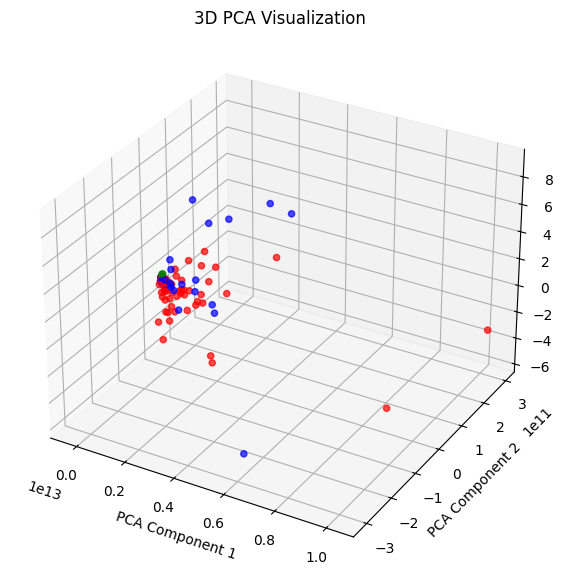

In [8]:
# 자료구조
import pandas as pd
import numpy as np
# normalize
from sklearn.preprocessing import StandardScaler
# 분류기
from sklearn import tree, ensemble, svm
# 분류 성능평가용
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
# 데이터 시각화용
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# 파라미터 조정
test_rate =0.8
randseed = 42
np.random.seed(randseed)
cri = ","
file_path = r"./data.csv"
# 분류 옵션
modellist=["decision tree","random forest","adaboost","SVM"]
# 스케일조정옵션
isScaling = True


# 파일에서 데이터 로드
# file_path, cri -> df
match(file_path.split(".")[-1].lower()):
    case "txt":
        df = pd.read_csv(file_path, delimiter=cri, skipinitialspace=True)
    case "csv":
        df = pd.read_csv(file_path, delimiter=cri, skipinitialspace=True)
    case "xlsx":
        df = pd.read_excel(file_path)
    case _:
        raise ValueError("Unsupported file type")


# 맞춤데이터 편집
# 진료년도, 진료과목 삭제
df = df.drop(df.columns[[0, 2]], axis=1)
# 의료기관의 라벨을 합치는 작업+ 의료기관종별 라벨을 0부터 시작하는 정수형 라벨로 변경
mapping = {
    '상급종합병원': 0,
    '종합병원': 0,
    '병원': 0,
    '요양병원': 0,
    '정신병원': 0,
    '의원': 1,
    '치과병원': 1,
    '치과의원': 1,
    '한방병원': 1,
    '한의원': 1,
    '보건의료원': 2,
    '보건소': 2,
    '보건지소': 2,
    '보건진료소': 2
}
df['의료기관종별'] = df['의료기관종별'].map(mapping)


# 데이터 형태 파악
print(df.head())
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df.iloc[:,1:])
lab = df.iloc[:,0]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
custom_colors = ['red', 'blue','green']
cmap = ListedColormap(custom_colors)
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=lab, cmap=cmap, alpha=0.7)
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D PCA Visualization")


# normalize
if isScaling:
    features = df.drop(df.columns[0], axis=1)
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
    df_scaled['의료기관종별'] = df['의료기관종별']
    print("Scaled data\n",df_scaled.head())
    df = df_scaled
else:
    # 노말라이즈를 하지 않아도 라벨이 마지막 열로 가게 조정
    tmp= df['의료기관종별']
    df = df.drop('의료기관종별', axis=1)
    df['의료기관종별'] = tmp


# 섞고 test data 분리
# df, test_rate -> train_data, test_data,train_size
data_size = len(df)
train_size = int(test_rate * data_size)
indice = np.arange(data_size)
np.random.shuffle(indice)

train_idx = indice[:train_size]
test_idx = indice[train_size:]

train_data = df.iloc[train_idx]
test_data = df.iloc[test_idx]
#라벨 분리
train_labels = train_data.iloc[:,-1]
test_labels = test_data.iloc[:,-1]
train_data = train_data.iloc[:,:-1]
test_data = test_data.iloc[:,:-1]


# 분류실행/결과 출력까지
# train_data,train_labels ,test_data, modellist-> predicted
# predicted, test_labels -> 결과 출력
for model in modellist:
    match(model):
        case "decision tree":
            classifier = tree.DecisionTreeClassifier(max_depth=3)
        case "random forest":
            classifier = ensemble.RandomForestClassifier(n_estimators=20, random_state=42)
        case "adaboost":
            classifier = ensemble.AdaBoostClassifier(estimator = tree.DecisionTreeClassifier(max_depth=3),n_estimators=20, random_state=42)
        case "SVM":
            classifier = svm.SVC(C = 1.0, gamma = 0.001)
        case _:
            raise ValueError("Unsupported model")

    classifier.fit(train_data, train_labels)
    predicted = classifier.predict(test_data)

    expected = test_labels
    print(15*"-")
    print(model,"\n random seed:",randseed," test_rate:",test_rate)
    print('Accuracy:',accuracy_score(expected, predicted))
    print('Confusion matrix:\n', confusion_matrix(expected, predicted))
    print("각 클래스의 점수")
    print("precision:",precision_score(expected, predicted, average=None))
    print("recall:",recall_score(expected, predicted, average=None))
    print("f-measure:",f1_score(expected, predicted, average=None))
    print("\n 평균점수")
    print("precision:",precision_score(expected, predicted, average='macro'))
    print("recall:",recall_score(expected, predicted, average='macro'))
    print("f-measure:",f1_score(expected, predicted, average='macro'))
    print(15*"-")


   의료기관종별      환자수   명세서청구건수     입내원일수       요양급여비용총액         보험자부담금
0       0      197       227       228       12438280        3686020
1       0  3868874  19718697  25106113  8160044150140  6750585175490
2       0   810134   2537395   3007901   612663538140   422378934480
3       0   276797   1398016   1629588   213390628930   137256247130
4       0   999944   3739235   5441727  2362437878060  2054028010630
Scaled data
         환자수   명세서청구건수     입내원일수  요양급여비용총액     보험자부담금  의료기관종별
0 -0.240495 -0.222168 -0.245523 -0.302712  -0.297213       0
1  1.174601  1.321414  1.692739  9.524661  10.100027       0
2  0.055766 -0.023556 -0.013320  0.435122   0.353329       0
3 -0.139319 -0.112748 -0.119731 -0.045734  -0.085817       0
4  0.125196  0.070525  0.174580  2.542429   2.866393       0
---------------
decision tree 
 random seed: 42  test_rate: 0.8
Accuracy: 0.8985507246376812
Confusion matrix:
 [[58  1]
 [ 6  4]]
각 클래스의 점수
precision: [0.90625 0.8    ]
recall: [0.98305085 0.4       ]
f-mea

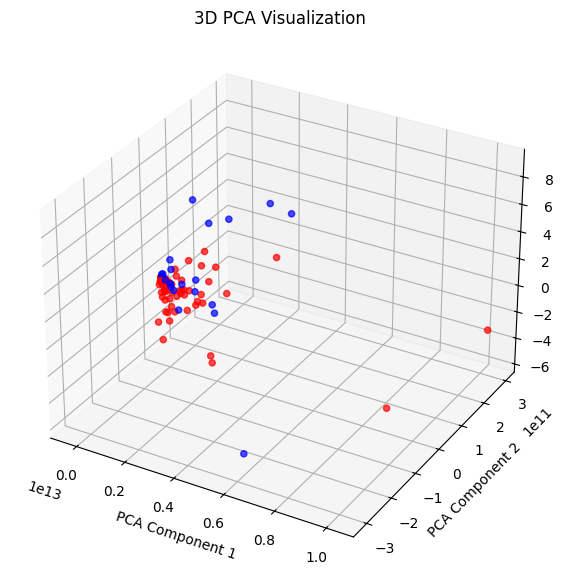

In [ ]:
# 자료구조
import pandas as pd
import numpy as np
# normalize
from sklearn.preprocessing import StandardScaler
# 분류기
from sklearn import tree, ensemble, svm
# 분류 성능평가용
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
# 데이터 시각화용
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# 파라미터 조정
test_rate =0.8
randseed = 42
np.random.seed(randseed)
cri = ","
file_path = r"./data.csv"
# 분류 옵션
modellist=["decision tree","random forest","adaboost","SVM"]
# 스케일조정옵션
isScaling = True


# 파일에서 데이터 로드
# file_path, cri -> df
match(file_path.split(".")[-1].lower()):
    case "txt":
        df = pd.read_csv(file_path, delimiter=cri, skipinitialspace=True)
    case "csv":
        df = pd.read_csv(file_path, delimiter=cri, skipinitialspace=True)
    case "xlsx":
        df = pd.read_excel(file_path)
    case _:
        raise ValueError("Unsupported file type")


# 맞춤데이터 편집
# 진료년도, 진료과목 삭제
df = df.drop(df.columns[[0, 2]], axis=1)
# 의료기관의 라벨을 합치는 작업+ 의료기관종별 라벨을 0부터 시작하는 정수형 라벨로 변경
mapping = {
    '상급종합병원': 0,
    '종합병원': 0,
    '병원': 0,
    '요양병원': 0,
    '정신병원': 0,
    '의원': 1,
    '치과병원': 0,
    '치과의원': 1,
    '한방병원': 0,
    '한의원': 1,
    '보건의료원': 1,
    '보건소': 1,
    '보건지소': 1,
    '보건진료소': 1
}
df['의료기관종별'] = df['의료기관종별'].map(mapping)


# 데이터 형태 파악
print(df.head())
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df.iloc[:,1:])
lab = df.iloc[:,0]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
custom_colors = ['red', 'blue']
cmap = ListedColormap(custom_colors)
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=lab, cmap=cmap, alpha=0.7)
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D PCA Visualization")


# normalize
if isScaling:
    features = df.drop(df.columns[0], axis=1)
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
    df_scaled['의료기관종별'] = df['의료기관종별']
    print("Scaled data\n",df_scaled.head())
    df = df_scaled
else:
    # 노말라이즈를 하지 않아도 라벨이 마지막 열로 가게 조정
    tmp= df['의료기관종별']
    df = df.drop('의료기관종별', axis=1)
    df['의료기관종별'] = tmp


# 섞고 test data 분리
# df, test_rate -> train_data, test_data,train_size
data_size = len(df)
train_size = int(test_rate * data_size)
indice = np.arange(data_size)
np.random.shuffle(indice)

train_idx = indice[:train_size]
test_idx = indice[train_size:]

train_data = df.iloc[train_idx]
test_data = df.iloc[test_idx]
#라벨 분리
train_labels = train_data.iloc[:,-1]
test_labels = test_data.iloc[:,-1]
train_data = train_data.iloc[:,:-1]
test_data = test_data.iloc[:,:-1]


# 분류실행/결과 출력까지
# train_data,train_labels ,test_data, modellist-> predicted
# predicted, test_labels -> 결과 출력
for model in modellist:
    match(model):
        case "decision tree":
            classifier = tree.DecisionTreeClassifier(max_depth=3)
        case "random forest":
            classifier = ensemble.RandomForestClassifier(n_estimators=20, random_state=42)
        case "adaboost":
            classifier = ensemble.AdaBoostClassifier(estimator = tree.DecisionTreeClassifier(max_depth=3),n_estimators=20, random_state=42)
        case "SVM":
            classifier = svm.SVC(C = 1.0, gamma = 0.001)
        case _:
            raise ValueError("Unsupported model")

    classifier.fit(train_data, train_labels)
    predicted = classifier.predict(test_data)

    expected = test_labels
    print(15*"-")
    print(model,"\n random seed:",randseed," test_rate:",test_rate)
    print('Accuracy:',accuracy_score(expected, predicted))
    print('Confusion matrix:\n', confusion_matrix(expected, predicted))
    print("각 클래스의 점수")
    print("precision:",precision_score(expected, predicted, average=None))
    print("recall:",recall_score(expected, predicted, average=None))
    print("f-measure:",f1_score(expected, predicted, average=None))
    print("\n 평균점수")
    print("precision:",precision_score(expected, predicted, average='macro'))
    print("recall:",recall_score(expected, predicted, average='macro'))
    print("f-measure:",f1_score(expected, predicted, average='macro'))
    print(15*"-")


   의료기관종별      환자수   명세서청구건수     입내원일수       요양급여비용총액         보험자부담금
0       0      197       227       228       12438280        3686020
1       0  3868874  19718697  25106113  8160044150140  6750585175490
2       0   810134   2537395   3007901   612663538140   422378934480
3       0   276797   1398016   1629588   213390628930   137256247130
4       0   999944   3739235   5441727  2362437878060  2054028010630
Scaled data
         환자수   명세서청구건수     입내원일수  요양급여비용총액     보험자부담금  의료기관종별
0 -0.240495 -0.222168 -0.245523 -0.302712  -0.297213       0
1  1.174601  1.321414  1.692739  9.524661  10.100027       0
2  0.055766 -0.023556 -0.013320  0.435122   0.353329       0
3 -0.139319 -0.112748 -0.119731 -0.045734  -0.085817       0
4  0.125196  0.070525  0.174580  2.542429   2.866393       0
---------------
decision tree 
 random seed: 42  test_rate: 0.8
Accuracy: 0.6956521739130435
Confusion matrix:
 [[13 11]
 [10 35]]
각 클래스의 점수
precision: [0.56521739 0.76086957]
recall: [0.54166667 0.77777778]

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


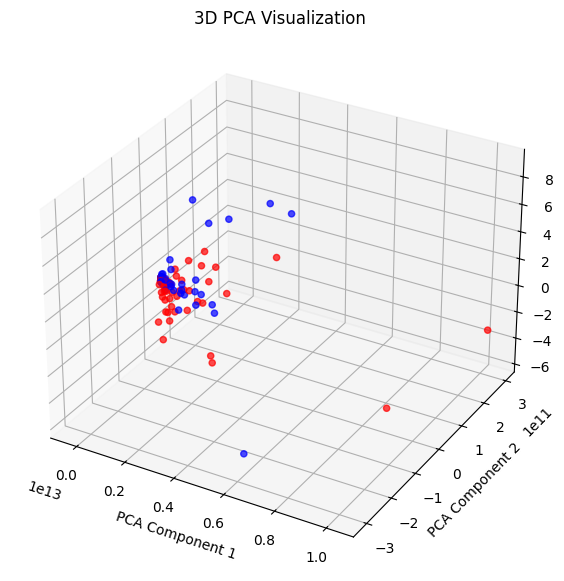

In [10]:
# 자료구조
import pandas as pd
import numpy as np
# normalize
from sklearn.preprocessing import StandardScaler
# 분류기
from sklearn import tree, ensemble, svm
# 분류 성능평가용
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
# 데이터 시각화용
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# 파라미터 조정
test_rate =0.8
randseed = 42
np.random.seed(randseed)
cri = ","
file_path = r"./data.csv"
# 분류 옵션
modellist=["decision tree","random forest","adaboost","SVM"]
# 스케일조정옵션
isScaling = True


# 파일에서 데이터 로드
# file_path, cri -> df
match(file_path.split(".")[-1].lower()):
    case "txt":
        df = pd.read_csv(file_path, delimiter=cri, skipinitialspace=True)
    case "csv":
        df = pd.read_csv(file_path, delimiter=cri, skipinitialspace=True)
    case "xlsx":
        df = pd.read_excel(file_path)
    case _:
        raise ValueError("Unsupported file type")


# 맞춤데이터 편집
# 진료년도, 진료과목 삭제
df = df.drop(df.columns[[0, 2]], axis=1)
# 의료기관의 라벨을 합치는 작업+ 의료기관종별 라벨을 0부터 시작하는 정수형 라벨로 변경
mapping = {
    '상급종합병원': 0,
    '종합병원': 0,
    '병원': 0,
    '요양병원': 1,
    '정신병원': 1,
    '의원': 1,
    '치과병원': 1,
    '치과의원': 1,
    '한방병원': 1,
    '한의원': 1,
    '보건의료원': 1,
    '보건소': 1,
    '보건지소': 1,
    '보건진료소': 1
}
df['의료기관종별'] = df['의료기관종별'].map(mapping)


# 데이터 형태 파악
print(df.head())
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df.iloc[:,1:])
lab = df.iloc[:,0]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
custom_colors = ['red', 'blue']
cmap = ListedColormap(custom_colors)
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=lab, cmap=cmap, alpha=0.7)
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D PCA Visualization")


# normalize
if isScaling:
    features = df.drop(df.columns[0], axis=1)
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
    df_scaled['의료기관종별'] = df['의료기관종별']
    print("Scaled data\n",df_scaled.head())
    df = df_scaled
else:
    # 노말라이즈를 하지 않아도 라벨이 마지막 열로 가게 조정
    tmp= df['의료기관종별']
    df = df.drop('의료기관종별', axis=1)
    df['의료기관종별'] = tmp


# 섞고 test data 분리
# df, test_rate -> train_data, test_data,train_size
data_size = len(df)
train_size = int(test_rate * data_size)
indice = np.arange(data_size)
np.random.shuffle(indice)

train_idx = indice[:train_size]
test_idx = indice[train_size:]

train_data = df.iloc[train_idx]
test_data = df.iloc[test_idx]
#라벨 분리
train_labels = train_data.iloc[:,-1]
test_labels = test_data.iloc[:,-1]
train_data = train_data.iloc[:,:-1]
test_data = test_data.iloc[:,:-1]


# 분류실행/결과 출력까지
# train_data,train_labels ,test_data, modellist-> predicted
# predicted, test_labels -> 결과 출력
for model in modellist:
    match(model):
        case "decision tree":
            classifier = tree.DecisionTreeClassifier(max_depth=3)
        case "random forest":
            classifier = ensemble.RandomForestClassifier(n_estimators=20, random_state=42)
        case "adaboost":
            classifier = ensemble.AdaBoostClassifier(estimator = tree.DecisionTreeClassifier(max_depth=3),n_estimators=20, random_state=42)
        case "SVM":
            classifier = svm.SVC(C = 1.0, gamma = 0.001)
        case _:
            raise ValueError("Unsupported model")

    classifier.fit(train_data, train_labels)
    predicted = classifier.predict(test_data)

    expected = test_labels
    print(15*"-")
    print(model,"\n random seed:",randseed," test_rate:",test_rate)
    print('Accuracy:',accuracy_score(expected, predicted))
    print('Confusion matrix:\n', confusion_matrix(expected, predicted))
    print("각 클래스의 점수")
    print("precision:",precision_score(expected, predicted, average=None))
    print("recall:",recall_score(expected, predicted, average=None))
    print("f-measure:",f1_score(expected, predicted, average=None))
    print("\n 평균점수")
    print("precision:",precision_score(expected, predicted, average='macro'))
    print("recall:",recall_score(expected, predicted, average='macro'))
    print("f-measure:",f1_score(expected, predicted, average='macro'))
    print(15*"-")
